## Importing necessary libraries and data

In [7]:

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# to split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to build linear regression_model using statsmodels
import statsmodels.api as sm



In [8]:
data = pd.read_csv('used_phone_data.csv')

data.head(25)

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price
0,Honor,Android,23.97,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,111.62,86.96
1,Honor,Android,28.10,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,249.39,161.49
2,Honor,Android,24.29,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,359.47,268.55
3,Honor,Android,26.04,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,278.93,180.23
4,Honor,Android,15.72,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,140.87,103.80
5,Honor,Android,21.43,yes,no,13.0,8.0,64.0,4.0,4000.0,176.0,2020,223,157.70,113.67
6,Honor,Android,19.84,yes,no,8.0,5.0,32.0,2.0,3020.0,144.0,2020,234,91.74,72.29
7,Honor,Android,18.57,yes,no,13.0,8.0,64.0,4.0,3400.0,164.0,2020,219,179.24,132.91
8,Honor,Android,15.72,yes,no,13.0,16.0,128.0,6.0,4000.0,165.0,2020,161,200.32,150.88
9,Honor,Android,21.43,yes,no,13.0,8.0,128.0,6.0,4000.0,176.0,2020,327,159.75,103.59


## Data Overview

- Observations
- Sanity checks

In [9]:
# check number of rows and number columns
data.shape

(3571, 15)

### This dataset has 3571 rows and 15 columns.

In [10]:
# checking column datatypes and number of non-null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3571 entries, 0 to 3570
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand_name        3571 non-null   object 
 1   os                3571 non-null   object 
 2   screen_size       3571 non-null   float64
 3   4g                3571 non-null   object 
 4   5g                3571 non-null   object 
 5   main_camera_mp    3391 non-null   float64
 6   selfie_camera_mp  3569 non-null   float64
 7   int_memory        3561 non-null   float64
 8   ram               3561 non-null   float64
 9   battery           3565 non-null   float64
 10  weight            3564 non-null   float64
 11  release_year      3571 non-null   int64  
 12  days_used         3571 non-null   int64  
 13  new_price         3571 non-null   float64
 14  used_price        3571 non-null   float64
dtypes: float64(9), int64(2), object(4)
memory usage: 418.6+ KB


### The data contains 3571 rows and 15 columns. 

Os. Brand name, 4g, and 5g are categorical variables, all other variables are numerical type.


In [92]:
# Creating copy of the data to avoid any changes to original data
df = data.copy()

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of used phone prices look like?
2. What percentage of the used phone market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a phone. How does the amount of RAM vary with the brand?
4. A large battery often increases a phone's weight, making it feel uncomfortable in the hands. How does the weight vary for phones offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones are available across different brands with a screen size larger than 6 inches?
6. Budget phones nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of budget phones offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the used phone price?

## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [12]:
# checking for missing values
df.isnull().sum()

brand_name            0
os                    0
screen_size           0
4g                    0
5g                    0
main_camera_mp      180
selfie_camera_mp      2
int_memory           10
ram                  10
battery               6
weight                7
release_year          0
days_used             0
new_price             0
used_price            0
dtype: int64

In [13]:
# checking for missing values
df.isnull().sum(axis=1).value_counts()

0    3368
1     193
2       8
3       2
dtype: int64

In [14]:
medianFiller = lambda x: x.fillna(x.median())
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
df[numeric_columns] = df[numeric_columns].apply(medianFiller, axis=0)

In [15]:
# checking for missing values
df.isnull().sum()

brand_name          0
os                  0
screen_size         0
4g                  0
5g                  0
main_camera_mp      0
selfie_camera_mp    0
int_memory          0
ram                 0
battery             0
weight              0
release_year        0
days_used           0
new_price           0
used_price          0
dtype: int64

In [16]:
# Let's look at the statistical summary of the data
pd.set_option(
    "display.float_format", lambda x: "%.3f" % x
)  # to display numbers rounded off to 3 decimal places

df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brand_name,3571,34,Others,509,NaN,NaN,NaN,NaN,NaN,NaN,NaN
os,3571,4,Android,3246,NaN,NaN,NaN,NaN,NaN,NaN,NaN
screen_size,3571.000,NaN,NaN,NaN,14.804,5.153,2.700,12.700,13.490,16.510,46.360
4g,3571,2,yes,2359,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5g,3571,2,no,3419,NaN,NaN,NaN,NaN,NaN,NaN,NaN
main_camera_mp,3571.000,NaN,NaN,NaN,9.330,4.705,0.080,5.000,8.000,13.000,48.000
selfie_camera_mp,3571.000,NaN,NaN,NaN,6.546,6.878,0.300,2.000,5.000,8.000,32.000
int_memory,3571.000,NaN,NaN,NaN,54.470,84.586,0.005,16.000,32.000,64.000,1024.000
ram,3571.000,NaN,NaN,NaN,4.057,1.390,0.030,4.000,4.000,4.000,16.000
battery,3571.000,NaN,NaN,NaN,3067.113,1363.063,80.000,2100.000,3000.000,4000.000,12000.000


In [17]:
# check the number of unique values in each column of the dataframe
data.nunique()

brand_name            34
os                     4
screen_size          127
4g                     2
5g                     2
main_camera_mp        44
selfie_camera_mp      37
int_memory            16
ram                   14
battery              354
weight               613
release_year           8
days_used            930
new_price           3099
used_price          3044
dtype: int64

## EDA

- It is a good idea to explore the data once again after manipulating it.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]),
 [Text(0, 0, 'Honor'),
  Text(1, 0, 'Others'),
  Text(2, 0, 'HTC'),
  Text(3, 0, 'Huawei'),
  Text(4, 0, 'Infinix'),
  Text(5, 0, 'Lava'),
  Text(6, 0, 'Lenovo'),
  Text(7, 0, 'LG'),
  Text(8, 0, 'Meizu'),
  Text(9, 0, 'Micromax'),
  Text(10, 0, 'Motorola'),
  Text(11, 0, 'Nokia'),
  Text(12, 0, 'OnePlus'),
  Text(13, 0, 'Oppo'),
  Text(14, 0, 'Realme'),
  Text(15, 0, 'Samsung'),
  Text(16, 0, 'Vivo'),
  Text(17, 0, 'Xiaomi'),
  Text(18, 0, 'ZTE'),
  Text(19, 0, 'Apple'),
  Text(20, 0, 'Asus'),
  Text(21, 0, 'Coolpad'),
  Text(22, 0, 'Acer'),
  Text(23, 0, 'Alcatel'),
  Text(24, 0, 'BlackBerry'),
  Text(25, 0, 'Celkon'),
  Text(26, 0, 'Gionee'),
  Text(27, 0, 'Google'),
  Text(28, 0, 'Karbonn'),
  Text(29, 0, 'Microsoft'),
  Text(30, 0, 'Panasonic'),
  Text(31, 0, 'Sony'),
  Text(32, 0, 'Spice'),
  Text(33, 0, 'XOLO')])

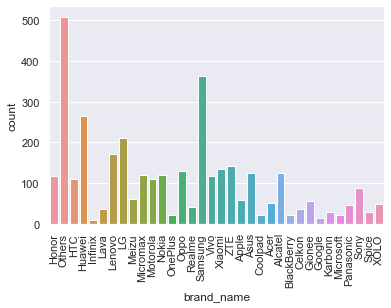

In [18]:
sns.countplot(x='brand_name', data=data)
plt.xticks(rotation=90)

In [19]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(15, 9), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,9))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.35, 0.65)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="coral"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="lime green"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

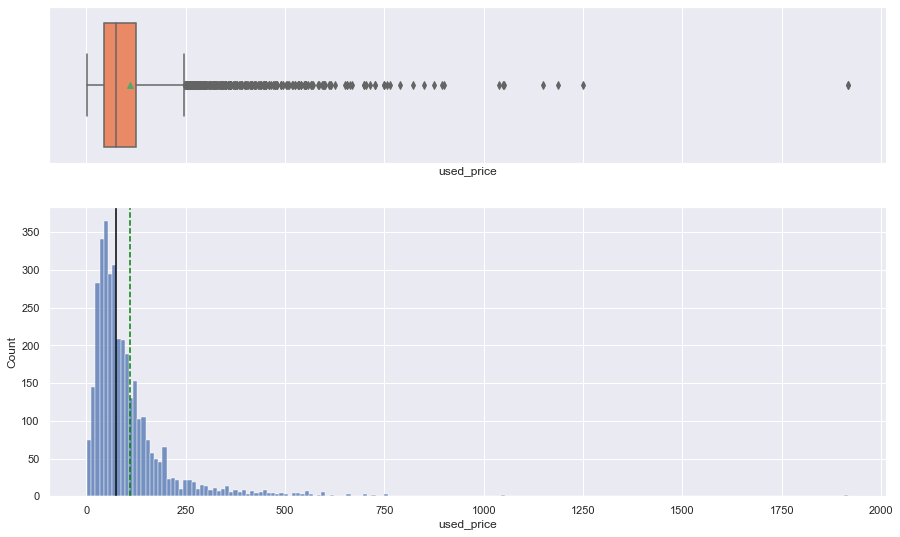

In [20]:
histogram_boxplot(df, "used_price")

# The distribution of used phone prices is right Skewed and there are a few  outliers.


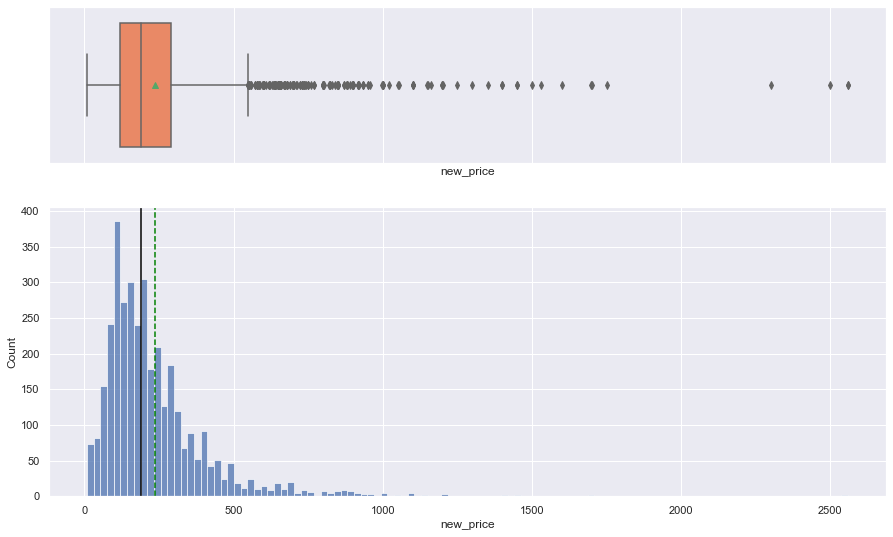

In [21]:
histogram_boxplot(df, "new_price")

## The distribution of new phone prices is right Skewed and there are a few  outliers.

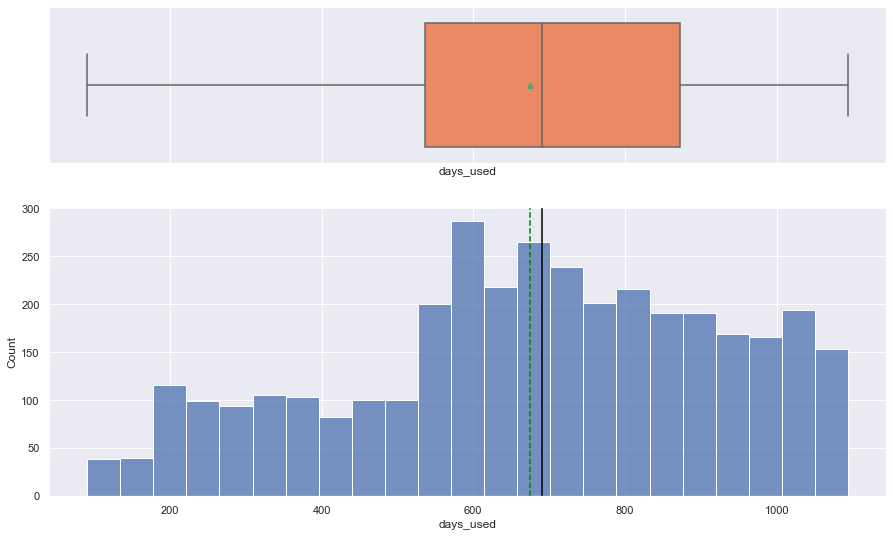

In [22]:
histogram_boxplot(df, "days_used")

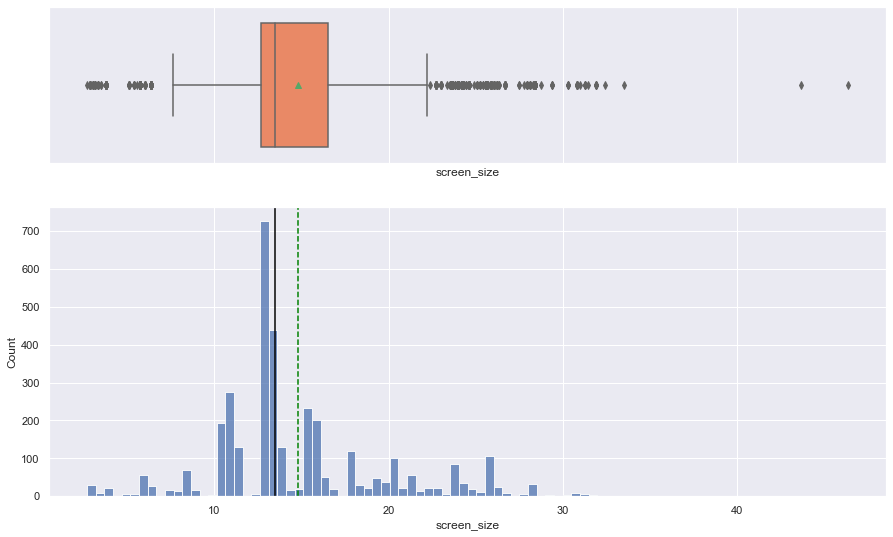

In [23]:
histogram_boxplot(df, "screen_size")

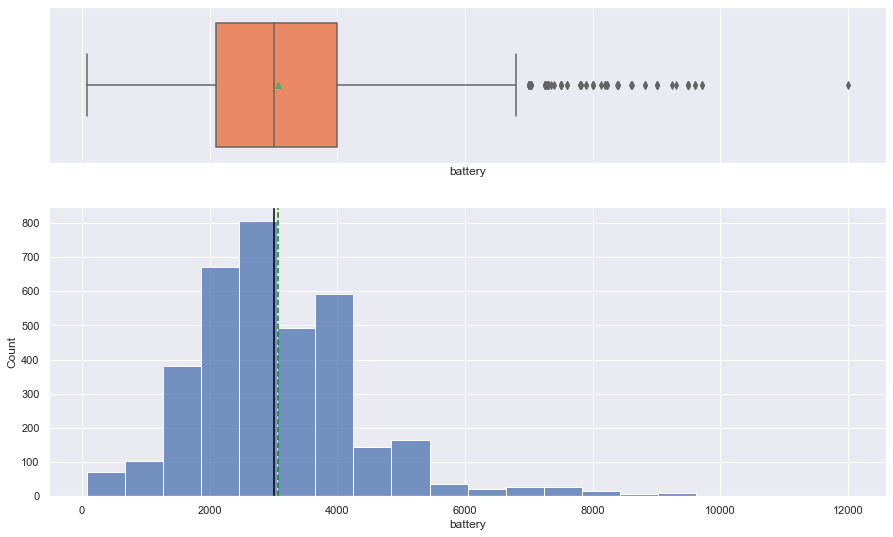

In [24]:
histogram_boxplot(df, "battery", bins=20)

In [26]:
data.head(3)

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price
0,Honor,Android,23.970,yes,no,13.000,5.000,64.000,3.000,3020.000,146.000,2020,127,111.620,86.960
1,Honor,Android,28.100,yes,yes,13.000,16.000,128.000,8.000,4300.000,213.000,2020,325,249.390,161.490
2,Honor,Android,24.290,yes,yes,13.000,8.000,128.000,8.000,4200.000,213.000,2020,162,359.470,268.550


In [27]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

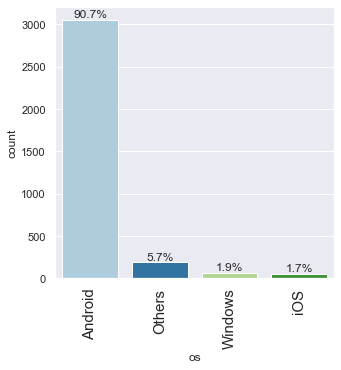

In [95]:
labeled_barplot(df, "os", perc=True)

# 90.9% of the 

In [29]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

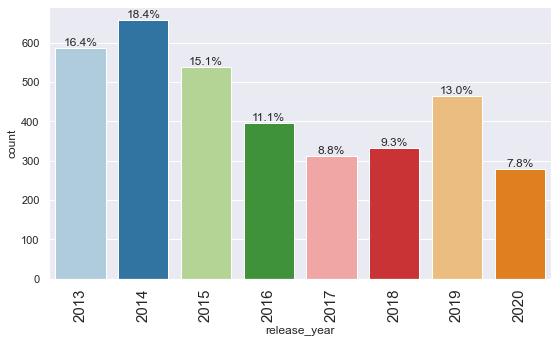

In [30]:
labeled_barplot(data, "release_year", perc=True)

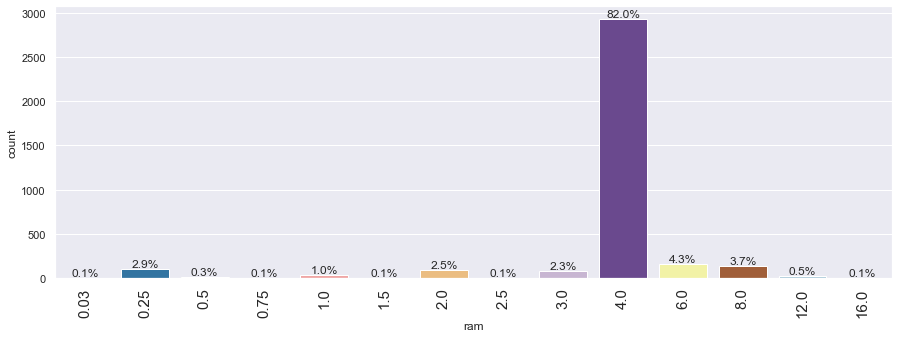

In [33]:
labeled_barplot(df, "ram", perc=True)

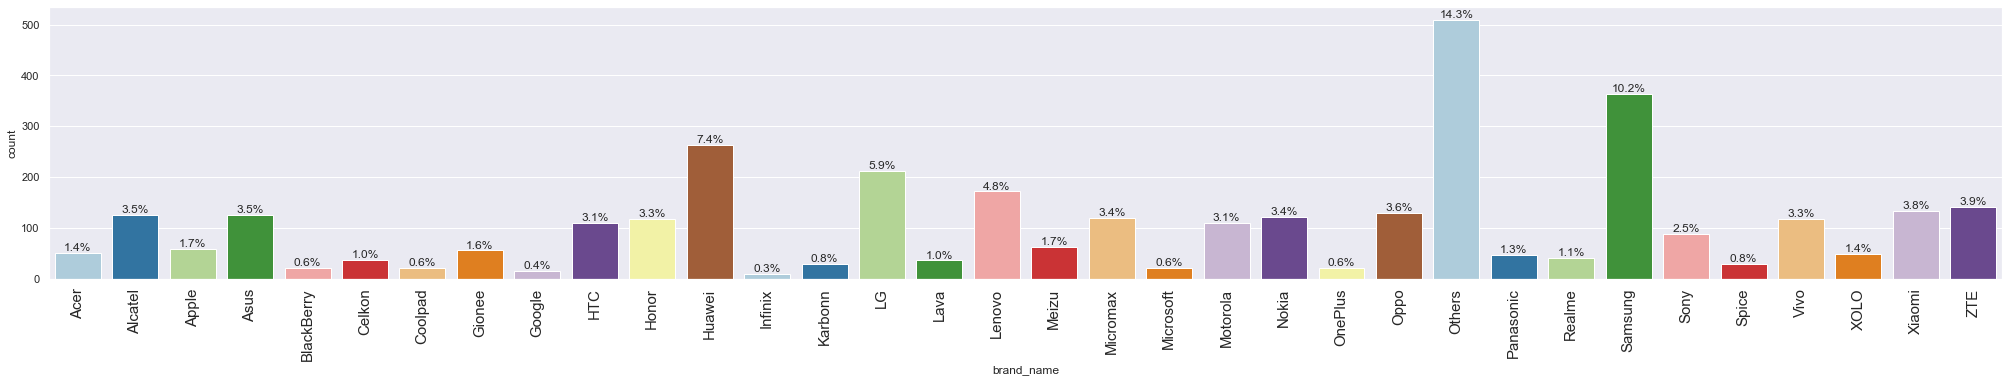

In [34]:
labeled_barplot(df, "brand_name", perc=True)

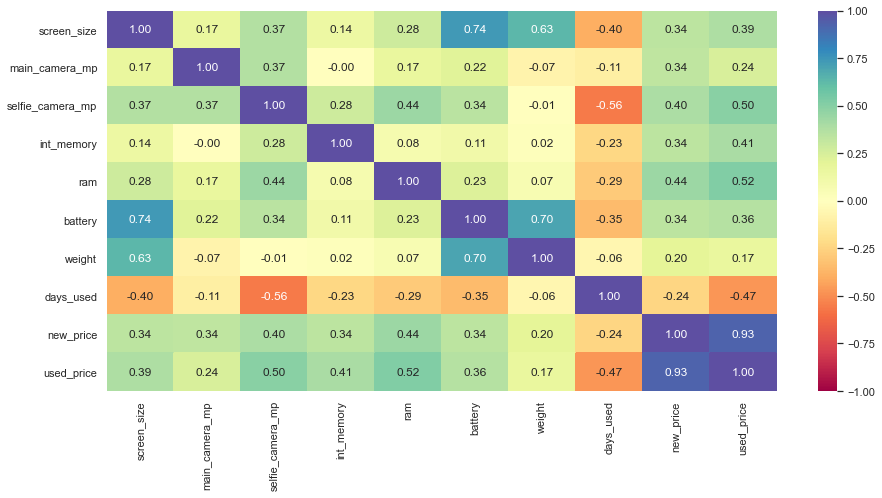

In [35]:
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
numeric_columns.remove("release_year")  # dropping year column as it is temporal variable

# correlation heatmap
plt.figure(figsize=(15, 7))
sns.heatmap(
    df[numeric_columns].corr(),
    annot=True,
    vmin=-1,
    vmax=1,
    fmt=".2f",
    cmap="Spectral",
)
plt.show()

We can see some correlation between the battery and weight, screen size and weight.

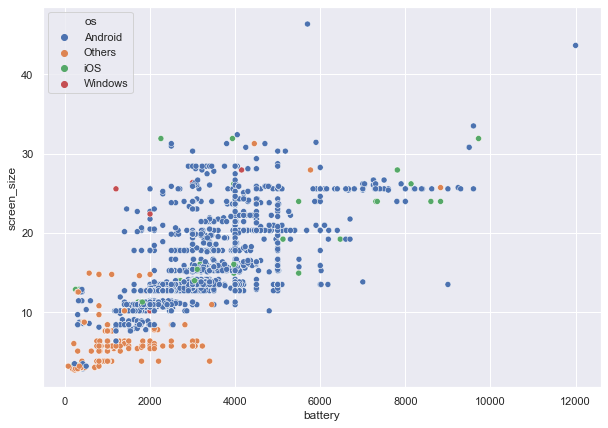

In [36]:
plt.figure(figsize=(10, 7))
sns.scatterplot(y="screen_size", x="battery", hue="os", data=df)
plt.show()

### Positive correlation between screen size and battery size. The bigger the screen size the bigger the battery.

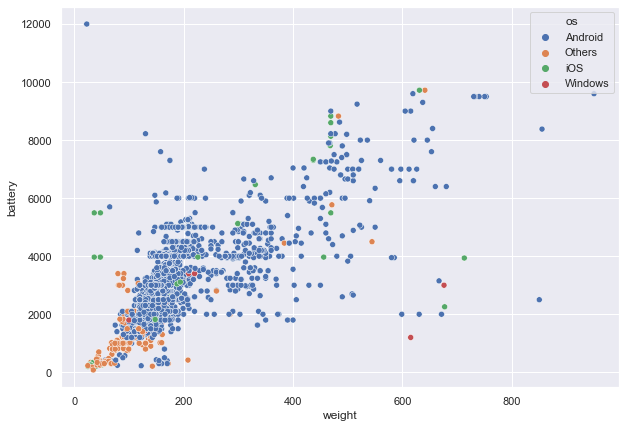

In [37]:
plt.figure(figsize=(10, 7))
sns.scatterplot(y="battery", x="weight", hue="os", data=df)
plt.show()

### Positive correlation between battery and weight. The bigger the battery, the heavier(weights more) the phone is.

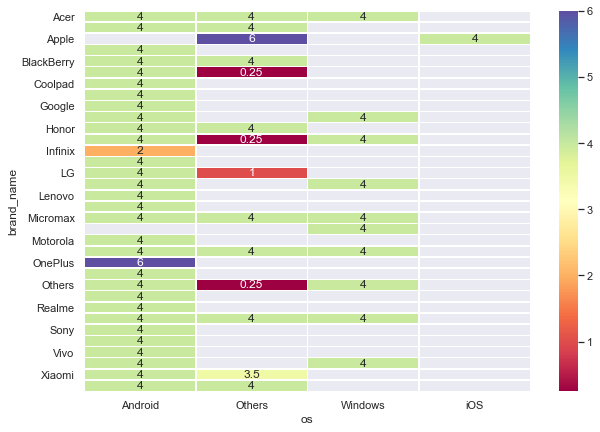

In [38]:
df_hm = df.pivot_table(
    index="brand_name", columns="os", values="ram", aggfunc=np.median
)

# Draw a heatmap
f, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(df_hm, cmap="Spectral", linewidths=0.5, annot=True, ax=ax)
plt.show()

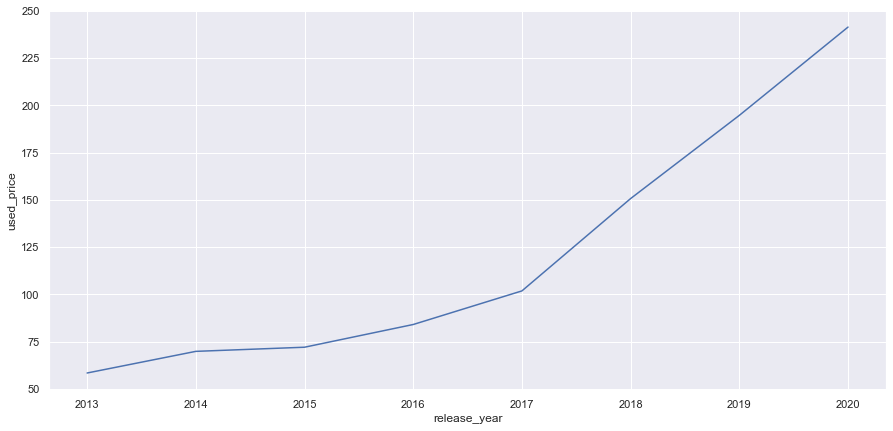

In [39]:
# average Price of Used phones over the years
plt.figure(figsize=(15, 7))
sns.lineplot(x="release_year", y="used_price", data=df, ci=None)
plt.show()

###  We can see how as the newest release years have a tendency to having a higher used price than previous years. The older the used phone, the lower the price is.

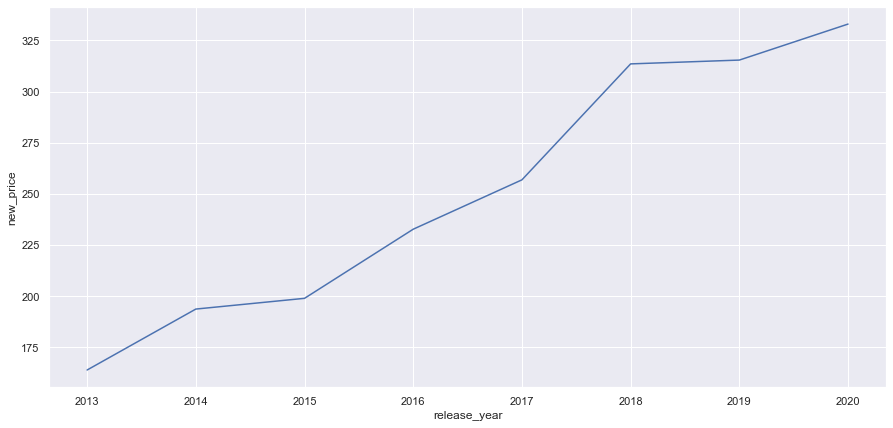

In [40]:
# average Price of New phones over the years
plt.figure(figsize=(15, 7))
sns.lineplot(x="release_year", y="new_price", data=df, ci=None)
plt.show()

In [113]:
# Used phones mean price by brand name
df.groupby("brand_name")["used_price"].mean()

brand_name
Acer          63.798
Alcatel       55.326
Apple        293.229
Asus          94.062
BlackBerry    83.033
Celkon        22.648
Coolpad       67.936
Gionee        91.882
Google       206.422
HTC           99.626
Honor        132.286
Huawei       176.257
Karbonn       38.069
LG           115.854
Lava          39.424
Lenovo        77.147
Meizu         93.805
Micromax      38.134
Microsoft     53.213
Motorola      88.336
Nokia         63.505
OnePlus      104.578
Oppo         150.587
Others        78.492
Panasonic     57.669
Realme        66.348
Samsung      132.083
Sony          99.556
Spice         32.300
Vivo         156.785
XOLO          48.848
Xiaomi       123.499
ZTE           86.082
Name: used_price, dtype: float64

In [42]:
#new phones mean price by brand name
df.groupby("brand_name")["new_price"].mean()

brand_name
Acer         172.868
Alcatel      142.499
Apple        639.005
Asus         250.999
BlackBerry   234.775
Celkon        60.956
Coolpad      194.285
Gionee       255.379
Google       474.717
HTC          249.854
Honor        235.898
Huawei       323.960
Infinix      106.017
Karbonn      110.384
LG           242.218
Lava         107.425
Lenovo       193.359
Meizu        269.569
Micromax     106.965
Microsoft    166.367
Motorola     209.448
Nokia        130.601
OnePlus      558.231
Oppo         341.912
Others       191.112
Panasonic    171.427
Realme       186.031
Samsung      293.855
Sony         280.830
Spice         98.000
Vivo         320.268
XOLO         130.899
Xiaomi       257.326
ZTE          216.801
Name: new_price, dtype: float64

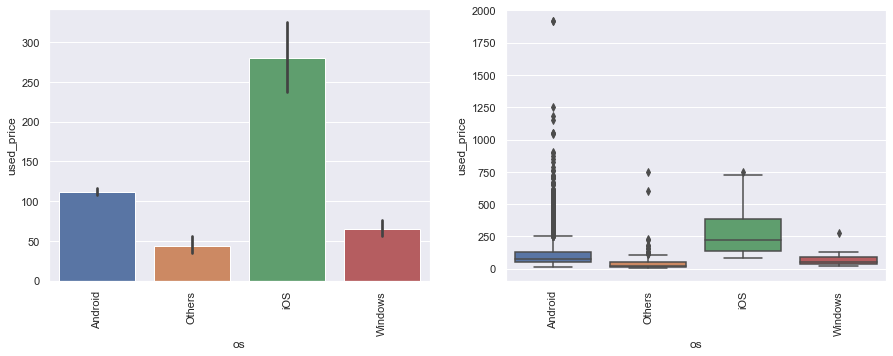

In [43]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.barplot(data=df, y="used_price", x="os")
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
sns.boxplot(data=df, y="used_price", x="os")
plt.xticks(rotation=90)

plt.show()

### Used phones with IOS as operating system, Apple phones, tend to have higher used prices. Used prices for phones  using Android operating system tend to have a higher variance in price.

In [115]:

# Mean Used phones price by Operating system

df.groupby("os")["used_price"].mean()

os
Android   104.951
Others     45.217
Windows    64.999
iOS       280.759
Name: used_price, dtype: float64

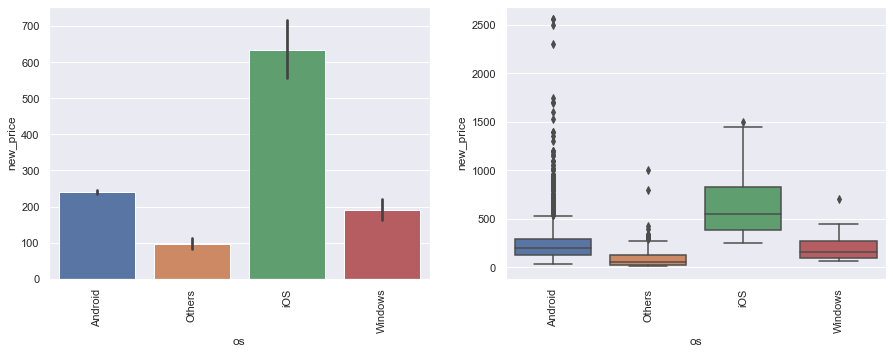

In [45]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.barplot(data=df, y="new_price", x="os")
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
sns.boxplot(data=df, y="new_price", x="os")
plt.xticks(rotation=90)

plt.show()

In [46]:
df.groupby("os")["new_price"].mean()

os
Android   240.237
Others     96.670
Windows   191.430
iOS       634.889
Name: new_price, dtype: float64

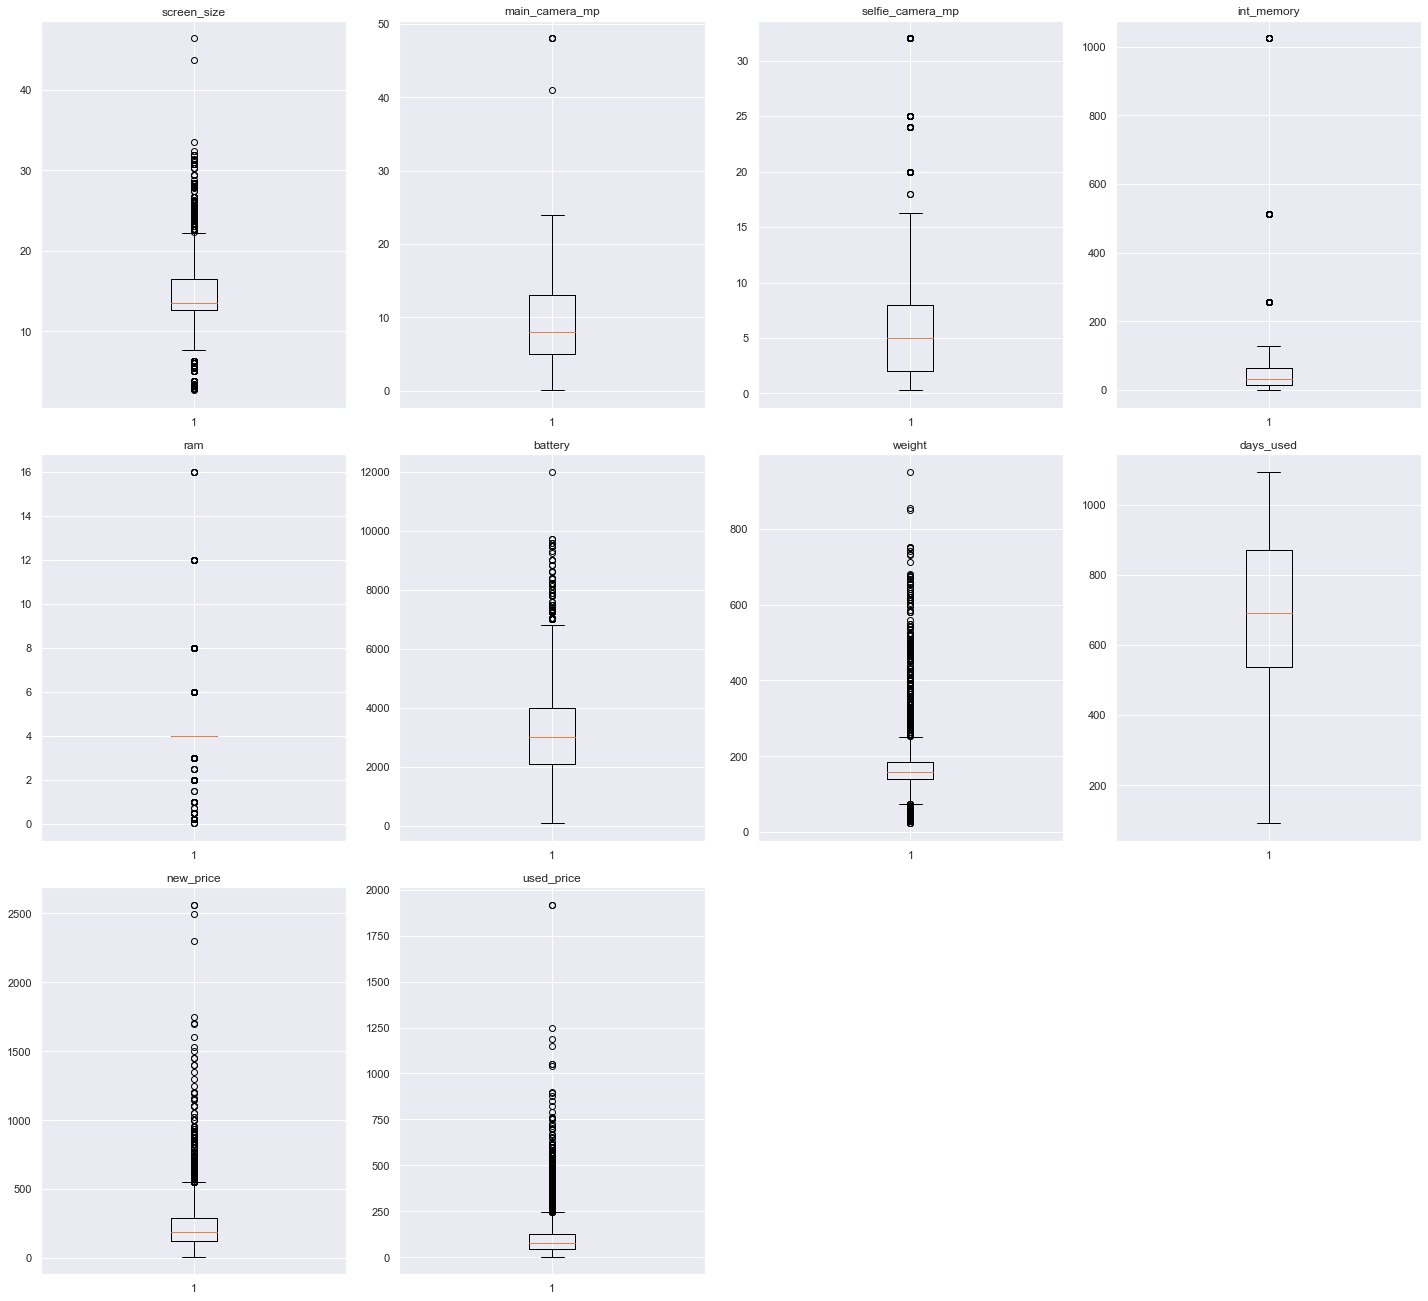

In [47]:
# let's plot the boxplots of all columns to check for outliers
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numeric_columns):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

We have a few boxplot variables with outliers like battery, weight, screen size. We must treat this outliers.

In [48]:
def treat_outliers(df, col):
    """
    treats outliers in a variable
    col: str, name of the numerical variable
    df: dataframe
    col: name of the column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)

    return df


def treat_outliers_all(df, col_list):
    """
    treat outlier in all numerical variables
    col_list: list of numerical variables
    df: data frame
    """
    for c in col_list:
        df = treat_outliers(df, c)

    return df

In [49]:
# treating the outliers
numerical_col = df.select_dtypes(include=np.number).columns.tolist()
df = treat_outliers_all(df, numerical_col)

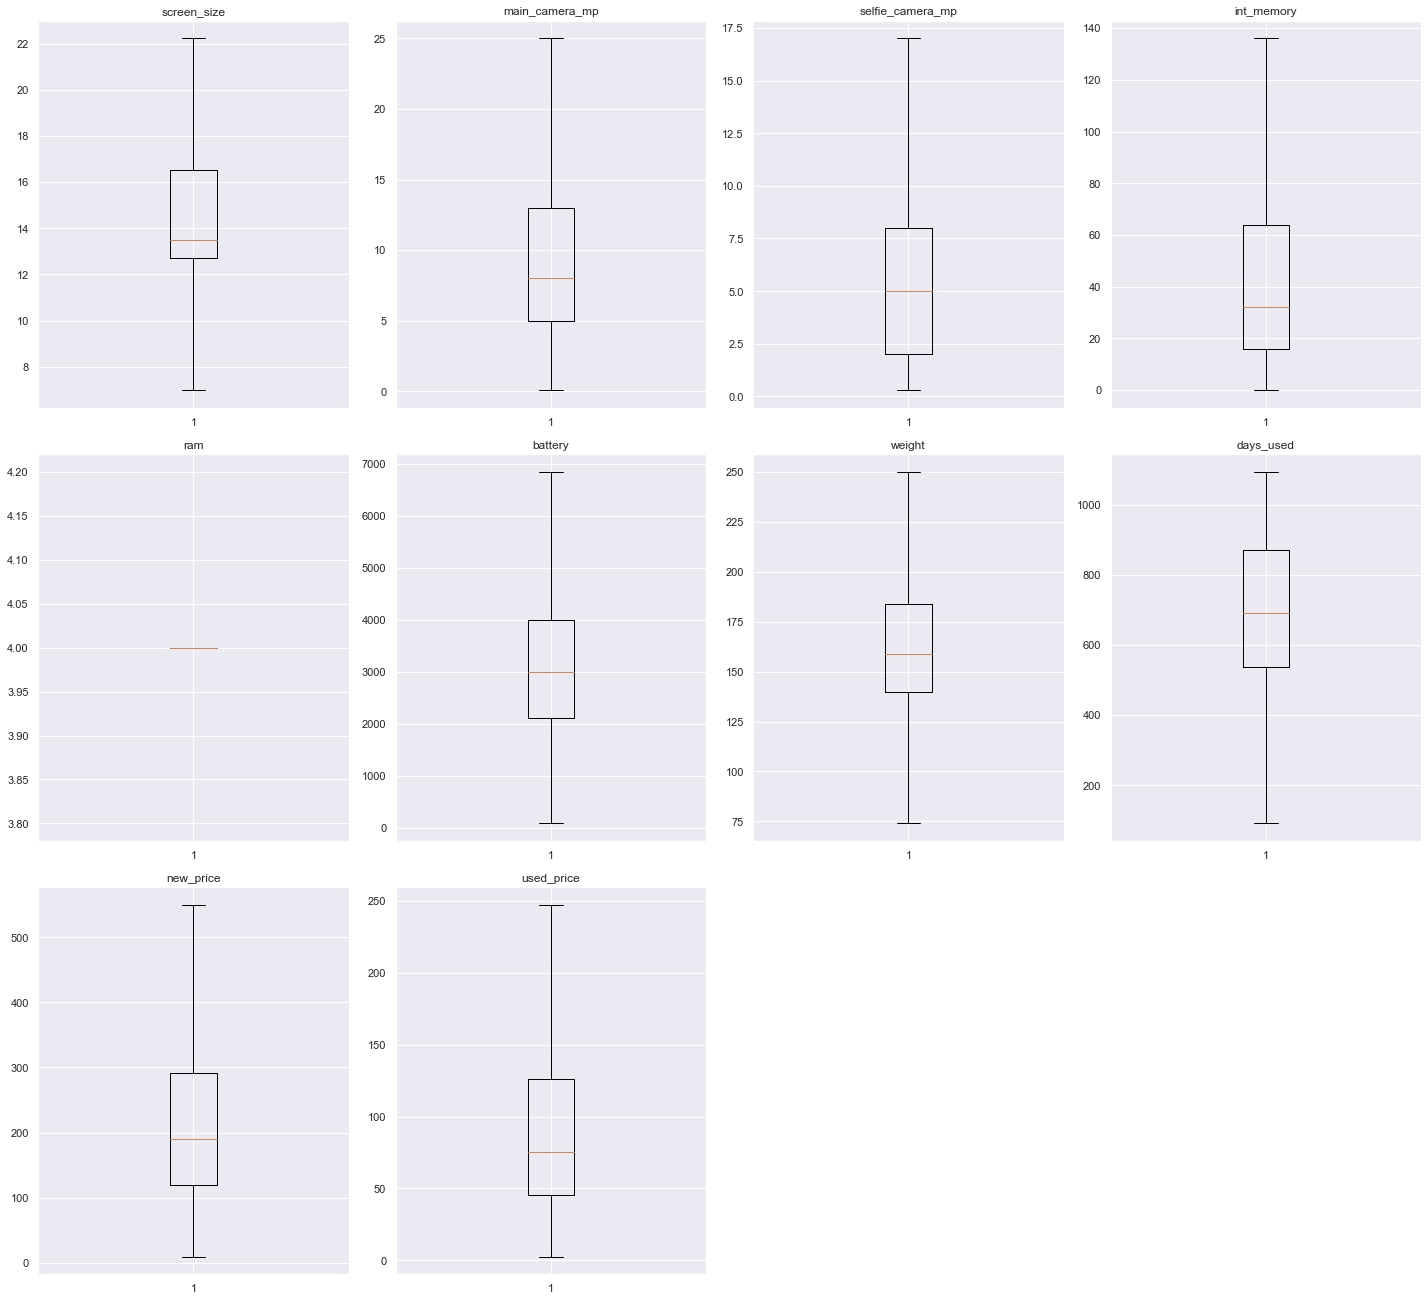

In [50]:
 #Check the boxplots to see if outliers have been treated or not
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numeric_columns):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

Outliers have been treated properly

## Building a Linear Regression model

In [51]:
# defining X and y variables
data = data.dropna()
X = data.drop("used_price", axis=1)
y = data["used_price"]

print(X.head())
print(y.head())

  brand_name       os  screen_size   4g   5g  main_camera_mp  \
0      Honor  Android       23.970  yes   no          13.000   
1      Honor  Android       28.100  yes  yes          13.000   
2      Honor  Android       24.290  yes  yes          13.000   
3      Honor  Android       26.040  yes  yes          13.000   
4      Honor  Android       15.720  yes   no          13.000   

   selfie_camera_mp  int_memory   ram  battery  weight  release_year  \
0             5.000      64.000 3.000 3020.000 146.000          2020   
1            16.000     128.000 8.000 4300.000 213.000          2020   
2             8.000     128.000 8.000 4200.000 213.000          2020   
3             8.000      64.000 6.000 7250.000 480.000          2020   
4             8.000      64.000 3.000 5000.000 185.000          2020   

   days_used  new_price  
0        127    111.620  
1        325    249.390  
2        162    359.470  
3        345    278.930  
4        293    140.870  
0    86.960
1   161.490
2 

In [52]:
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)
X.head()

,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,...,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,23.970,13.000,5.000,64.000,3.000,3020.000,146.000,2020,127,111.620,...,0,0,0,0,0,0,0,0,1,0
1,28.100,13.000,16.000,128.000,8.000,4300.000,213.000,2020,325,249.390,...,0,0,0,0,0,0,0,0,1,1
2,24.290,13.000,8.000,128.000,8.000,4200.000,213.000,2020,162,359.470,...,0,0,0,0,0,0,0,0,1,1
3,26.040,13.000,8.000,64.000,6.000,7250.000,480.000,2020,345,278.930,...,0,0,0,0,0,0,0,0,1,1
4,15.720,13.000,8.000,64.000,3.000,5000.000,185.000,2020,293,140.870,...,0,0,0,0,0,0,0,0,1,0


In [53]:
# splitting data in 70:30 ratio for train to test data

x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [54]:
#checking number of rows in data vs number of rows in data after droping missing values
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])
print("Number of rows in train data =", x_train.dropna().shape[0])
print("Number of rows in test data =", x_test.dropna().shape[0])

Number of rows in train data = 2357
Number of rows in test data = 1011
Number of rows in train data = 2357
Number of rows in test data = 1011


In [55]:
#cheking missing values
df.isnull().sum()

brand_name          0
os                  0
screen_size         0
4g                  0
5g                  0
main_camera_mp      0
selfie_camera_mp    0
int_memory          0
ram                 0
battery             0
weight              0
release_year        0
days_used           0
new_price           0
used_price          0
dtype: int64

In [56]:
#dropping missing values
data.dropna()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price
0,Honor,Android,23.970,yes,no,13.000,5.000,64.000,3.000,3020.000,146.000,2020,127,111.620,86.960
1,Honor,Android,28.100,yes,yes,13.000,16.000,128.000,8.000,4300.000,213.000,2020,325,249.390,161.490
2,Honor,Android,24.290,yes,yes,13.000,8.000,128.000,8.000,4200.000,213.000,2020,162,359.470,268.550
3,Honor,Android,26.040,yes,yes,13.000,8.000,64.000,6.000,7250.000,480.000,2020,345,278.930,180.230
4,Honor,Android,15.720,yes,no,13.000,8.000,64.000,3.000,5000.000,185.000,2020,293,140.870,103.800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3564,Apple,iOS,15.400,yes,no,8.000,7.000,64.000,4.000,3110.000,194.000,2019,208,538.042,401.390
3567,Asus,Android,15.240,yes,no,13.000,8.000,128.000,8.000,4000.000,200.000,2018,541,518.814,259.300
3568,Alcatel,Android,18.730,yes,no,13.000,5.000,32.000,3.000,4000.000,165.000,2020,201,92.650,69.810
3569,Alcatel,Android,18.730,yes,no,13.000,5.000,32.000,2.000,4000.000,160.000,2020,149,101.915,76.070


In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3368 entries, 0 to 3570
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand_name        3368 non-null   object 
 1   os                3368 non-null   object 
 2   screen_size       3368 non-null   float64
 3   4g                3368 non-null   object 
 4   5g                3368 non-null   object 
 5   main_camera_mp    3368 non-null   float64
 6   selfie_camera_mp  3368 non-null   float64
 7   int_memory        3368 non-null   float64
 8   ram               3368 non-null   float64
 9   battery           3368 non-null   float64
 10  weight            3368 non-null   float64
 11  release_year      3368 non-null   int64  
 12  days_used         3368 non-null   int64  
 13  new_price         3368 non-null   float64
 14  used_price        3368 non-null   float64
dtypes: float64(9), int64(2), object(4)
memory usage: 421.0+ KB


In [58]:
df = df.replace([np.inf, -np.inf], np.nan) 
print(df)

     brand_name       os  screen_size   4g   5g  main_camera_mp  \
0         Honor  Android       22.225  yes   no          13.000   
1         Honor  Android       22.225  yes  yes          13.000   
2         Honor  Android       22.225  yes  yes          13.000   
3         Honor  Android       22.225  yes  yes          13.000   
4         Honor  Android       15.720  yes   no          13.000   
...         ...      ...          ...  ...  ...             ...   
3566       Asus  Android       15.880  yes   no           8.000   
3567       Asus  Android       15.240  yes   no          13.000   
3568    Alcatel  Android       18.730  yes   no          13.000   
3569    Alcatel  Android       18.730  yes   no          13.000   
3570    Alcatel  Android       13.490  yes   no          13.000   

      selfie_camera_mp  int_memory   ram  battery  weight  release_year  \
0                5.000      64.000 4.000 3020.000 146.000          2020   
1               16.000     128.000 4.000 4300

In [59]:
# Dropping all the rows with nan values
df.dropna(inplace=True)
  
# Printing df
df

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price
0,Honor,Android,22.225,yes,no,13.000,5.000,64.000,4.000,3020.000,146.000,2020,127,111.620,86.960
1,Honor,Android,22.225,yes,yes,13.000,16.000,128.000,4.000,4300.000,213.000,2020,325,249.390,161.490
2,Honor,Android,22.225,yes,yes,13.000,8.000,128.000,4.000,4200.000,213.000,2020,162,359.470,247.192
3,Honor,Android,22.225,yes,yes,13.000,8.000,64.000,4.000,6850.000,250.000,2020,345,278.930,180.230
4,Honor,Android,15.720,yes,no,13.000,8.000,64.000,4.000,5000.000,185.000,2020,293,140.870,103.800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3566,Asus,Android,15.880,yes,no,8.000,8.000,64.000,4.000,5000.000,190.000,2019,232,549.642,247.192
3567,Asus,Android,15.240,yes,no,13.000,8.000,128.000,4.000,4000.000,200.000,2018,541,518.814,247.192
3568,Alcatel,Android,18.730,yes,no,13.000,5.000,32.000,4.000,4000.000,165.000,2020,201,92.650,69.810
3569,Alcatel,Android,18.730,yes,no,13.000,5.000,32.000,4.000,4000.000,160.000,2020,149,101.915,76.070


In [60]:
# fitting the linear regression model on the train data (70% of the whole data)

linearregression = LinearRegression()
linearregression.fit(x_train, y_train)

LinearRegression()

In [61]:
coef_df = pd.DataFrame(
    np.append(linearregression.coef_, linearregression.intercept_),
    index=x_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)

coef_df

,Coefficients
screen_size,-0.508
main_camera_mp,-1.782
selfie_camera_mp,-0.192
int_memory,0.049
ram,3.512
battery,-0.000
weight,-0.016
release_year,3.590
days_used,-0.104
new_price,0.526


In [62]:
# predictions on the test set
pred = linearregression.predict(x_test)

df_pred_test = pd.DataFrame({"Actual": y_test, "Predicted": pred})
df_pred_test.head(10)

,Actual,Predicted
3325,476.440,483.612
1035,43.400,21.780
2568,66.240,81.042
176,417.140,351.860
376,247.990,221.440
391,101.940,115.439
947,66.370,56.380
76,71.850,51.695
887,23.880,-0.358
2018,104.480,133.631


## Model performance evaluation

In [63]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [64]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
linearregression_train_perf = model_performance_regression(
    linearregression, x_train, y_train
)
linearregression_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,27.011,15.841,0.946,0.945,27.607


### This model is pretty good. 94 percent accuracy. RMSE and MAE have little variaton, knowing thagt the min price and max price for used price ranges from  $2.51 to $1900 with a variation of approximately $27.

In [65]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
linearregression_test_perf = model_performance_regression(
    linearregression, x_test, y_test
)
linearregression_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,27.170,16.736,0.939,0.936,27.392


In [66]:
# unlike sklearn, statsmodels does not add a constant to the data on its own
# we have to add the constant manually
x_train1 = sm.add_constant(x_train)
# adding constant to the test data
x_test1 = sm.add_constant(x_test)

olsmod0 = sm.OLS(y_train, x_train1).fit()
print(olsmod0.summary())

                            OLS Regression Results                            
Dep. Variable:             used_price   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     866.9
Date:                Fri, 20 Aug 2021   Prob (F-statistic):               0.00
Time:                        20:46:11   Log-Likelihood:                -11114.
No. Observations:                2357   AIC:                         2.232e+04
Df Residuals:                    2309   BIC:                         2.260e+04
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -7163.79

In [82]:
#Adding constant column of ones
X_1 = sm.add_constant(X)
#Fitting sm.OLS model
model = sm.OLS(y,X_1).fit()
model.pvalues

const                   0.000
screen_size             0.103
main_camera_mp          0.000
selfie_camera_mp        0.115
int_memory              0.000
ram                     0.000
battery                 0.428
weight                  0.055
release_year            0.000
days_used               0.000
new_price               0.000
brand_name_Alcatel      0.966
brand_name_Apple        0.000
brand_name_Asus         0.298
brand_name_BlackBerry   0.750
brand_name_Celkon       0.172
brand_name_Coolpad      0.711
brand_name_Gionee       0.012
brand_name_Google       0.328
brand_name_HTC          0.465
brand_name_Honor        0.038
brand_name_Huawei       0.974
brand_name_Karbonn      0.343
brand_name_LG           0.982
brand_name_Lava         0.504
brand_name_Lenovo       0.450
brand_name_Meizu        0.518
brand_name_Micromax     0.274
brand_name_Microsoft    0.924
brand_name_Motorola     0.990
brand_name_Nokia        0.010
brand_name_OnePlus      0.189
brand_name_Oppo         0.016
brand_name

In [83]:
#Backward Elimination
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['main_camera_mp', 'int_memory', 'ram', 'weight', 'release_year', 'days_used', 'new_price', 'brand_name_Apple', 'brand_name_Asus', 'brand_name_Gionee', 'brand_name_Honor', 'brand_name_Lenovo', 'brand_name_Nokia', 'brand_name_Oppo', 'brand_name_Others', 'brand_name_Samsung', 'brand_name_Vivo', 'os_iOS', '4g_yes', '5g_yes']


In [84]:
# defining X and y variables
data = data.dropna()
X = data.drop("used_price", axis=1)
y = data["used_price"]

print(X.head())
print(y.head())

  brand_name       os  screen_size   4g   5g  main_camera_mp  \
0      Honor  Android       23.970  yes   no          13.000   
1      Honor  Android       28.100  yes  yes          13.000   
2      Honor  Android       24.290  yes  yes          13.000   
3      Honor  Android       26.040  yes  yes          13.000   
4      Honor  Android       15.720  yes   no          13.000   

   selfie_camera_mp  int_memory   ram  battery  weight  release_year  \
0             5.000      64.000 3.000 3020.000 146.000          2020   
1            16.000     128.000 8.000 4300.000 213.000          2020   
2             8.000     128.000 8.000 4200.000 213.000          2020   
3             8.000      64.000 6.000 7250.000 480.000          2020   
4             8.000      64.000 3.000 5000.000 185.000          2020   

   days_used  new_price  
0        127    111.620  
1        325    249.390  
2        162    359.470  
3        345    278.930  
4        293    140.870  
0    86.960
1   161.490
2 

In [86]:

# predictions on the test set
pred = linearregression.predict(x_test)

df_pred_test = pd.DataFrame({"Actual": y_test, "Predicted": pred})
df_pred_test.head(10)

,Actual,Predicted
3325,476.440,483.612
1035,43.400,21.780
2568,66.240,81.042
176,417.140,351.860
376,247.990,221.440
391,101.940,115.439
947,66.370,56.380
76,71.850,51.695
887,23.880,-0.358
2018,104.480,133.631


In [87]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf


In [88]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
linearregression_train_perf = model_performance_regression(
    linearregression, x_train, y_train
)
linearregression_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,27.011,15.841,0.946,0.945,27.607


In [68]:
#Used phones max used price

print("Used phones max used price is $", max(data.used_price))

Used phones max used price is $ 1916.54


In [69]:
#Used phones min used price

print("Used phones min used price is $", min(data.used_price))

Used phones min used price is $ 2.51


In [70]:
print("The mean of column 'used_price' is :")
print(df['used_price'].mean())

The mean of column 'used_price' is :
95.52895687482518


In [71]:
print("The median of column 'used_price' is :")
print(df['used_price'].median())

The median of column 'used_price' is :
75.53


In [72]:
#getting phones under $200 by brand name

data[data.used_price < 200][['brand_name', 'used_price']]

,brand_name,used_price
0,Honor,86.960
1,Honor,161.490
3,Honor,180.230
4,Honor,103.800
5,Honor,113.670
...,...,...
3559,Samsung,51.180
3560,Samsung,48.470
3568,Alcatel,69.810
3569,Alcatel,76.070


In [118]:

data[data.screen_size < 6.0][['brand_name']]

,brand_name
97,LG
115,Nokia
116,Nokia
118,Nokia
119,Nokia
...,...
2841,Sony
2907,Others
2913,Others
3193,ZTE


In [121]:

data[data.selfie_camera_mp < 8.0][['brand_name']]

,brand_name
0,Honor
6,Honor
15,Honor
19,Honor
20,Honor
...,...
3563,Apple
3564,Apple
3568,Alcatel
3569,Alcatel


In [119]:
data.head(3)

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price
0,Honor,Android,23.970,yes,no,13.000,5.000,64.000,3.000,3020.000,146.000,2020,127,111.620,86.960
1,Honor,Android,28.100,yes,yes,13.000,16.000,128.000,8.000,4300.000,213.000,2020,325,249.390,161.490
2,Honor,Android,24.290,yes,yes,13.000,8.000,128.000,8.000,4200.000,213.000,2020,162,359.470,268.550


In [73]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# we will define a function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [74]:

checking_vif(x_train1)

,feature,VIF
0,const,3410101.320
1,screen_size,3.216
2,main_camera_mp,2.030
3,selfie_camera_mp,2.592
4,int_memory,1.382
5,ram,1.710
6,battery,3.733
7,weight,3.169
8,release_year,3.912
9,days_used,2.248


In [75]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

In [79]:
col_list = [
    "brand_name_Apple",
    "brand_name_Samsung",
    "brand_name_others",
]

res = treating_multicollinearity(x_train1, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,brand_name_Apple,0.945,27.290
1,brand_name_others,0.945,27.291
2,brand_name_Samsung,0.945,27.293


In [90]:
col_to_drop = "brand_name_Apple","brand_name_others", "brand_name_Samsung"
x_train2 = x_train1.loc[:, ~x_train1.columns.str.startswith(col_to_drop)]
x_test2 = x_test1.loc[:, ~x_test1.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train2)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  ('brand_name_Apple', 'brand_name_others', 'brand_name_Samsung')


,feature,VIF
0,const,3407179.733
1,screen_size,3.214
2,main_camera_mp,2.028
3,selfie_camera_mp,2.587
4,int_memory,1.381
5,ram,1.710
6,battery,3.718
7,weight,3.168
8,release_year,3.908
9,days_used,2.248


In [91]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
linearregression_test_perf = model_performance_regression(
    linearregression, x_test, y_test
)
linearregression_test_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,27.170,16.736,0.939,0.936,27.392


## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

In [101]:
# let us create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmod2.fittedvalues  # predicted values
df_pred["Residuals"] = olsmod2.resid  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
652,6.480,-29.772,36.252
2960,60.000,53.638,6.362
2123,39.820,33.547,6.273
588,50.270,61.400,-11.130
723,73.330,78.650,-5.320


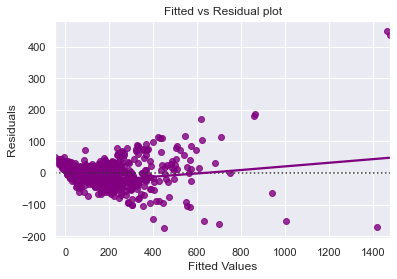

In [102]:
# let's plot the fitted values vs residuals

sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

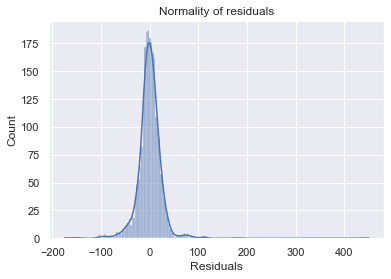

In [103]:
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.show()

### Bell shaped distribution of the residuals. Normaly distributed.

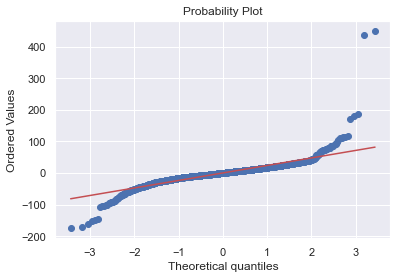

In [104]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()


### The residuals follow a straight line. The tails seem to be an exeption in not following the straight line.

In [105]:
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.7512267827987671, pvalue=0.0)

### The residuals are normal. 
The assumption that the distribution is normal is satisfied.

###  We are going to check for Homoscedasticity

In [ ]:
H0: Null hypothesis: Residuals are homoscedastic
H1: Alternate hypothesis: Residuals have heteroscedasticity

In [108]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train)
lzip(name, test)

[('F statistic', 0.7865488111480139), ('p-value', 0.9999781798819531)]

### Since p-value is < 0.5, we  say that the residuals are homoscedastic.

## Final Model Summary


In [110]:
# predictions on the test set
pred = olsmod2.predict(x_test)

df_pred_test = pd.DataFrame({"Actual": y_test, "Predicted": pred})
df_pred_test.sample(10, random_state=1)

,Actual,Predicted
1141,99.770,105.624
1163,51.430,37.780
1594,23.580,12.493
1890,88.370,89.682
2692,126.320,139.745
1517,28.380,31.583
810,65.930,67.312
2597,200.070,227.496
3100,99.910,115.074
51,174.790,197.352


### We can see here that our model has returned  good prediction results, and the actual and predicted values are comparable with little variance of just around $27 from min and max used phones price.

## Actionable Insights and Recommendations

Release year and operating system of the used phones will have the biggest impact of the phones price.

Latest or most recent years used phone prices have a tendency to beign sold at higher prices.

Phones that are brand name Apple and have IOS Operating system tend to have a higher price than phones with others Operating systems.

There are 113 brand phones with Screen size larger than 6 inches.



- 